<a href="https://colab.research.google.com/github/RajorshiAdhikaryProjects/-Customer-Segmentation-Project/blob/main/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fetching Data from Kaagle

In [14]:
!pip install kaggle


!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/


!kaggle datasets download -d vjchoudhary7/customer-segmentation-tutorial-in-python


!unzip customer-segmentation-tutorial-in-python.zip
print('Data Unzipped')

mv: cannot stat 'kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python
License(s): other
  0% 0.00/1.55k [00:00<?, ?B/s]
100% 1.55k/1.55k [00:00<00:00, 4.56MB/s]
Archive:  customer-segmentation-tutorial-in-python.zip
  inflating: Mall_Customers.csv      
Data Unzipped


# Import Libraries

In [15]:
import numpy as np
import pandas as pd

# Load the Dataset

In [16]:
data = pd.read_csv('Mall_Customers.csv')
print(data.head())

   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


# Exploratory Data Analysis (EDA)

**Inspect the Dataset**

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


**Data Visualization**

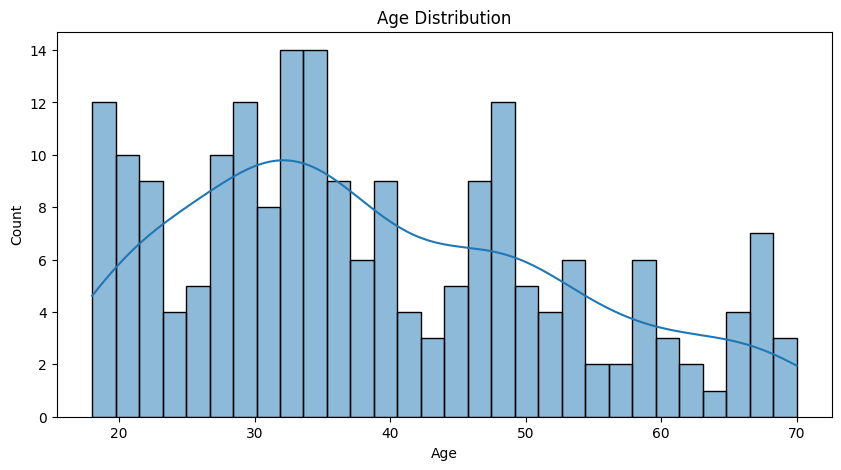

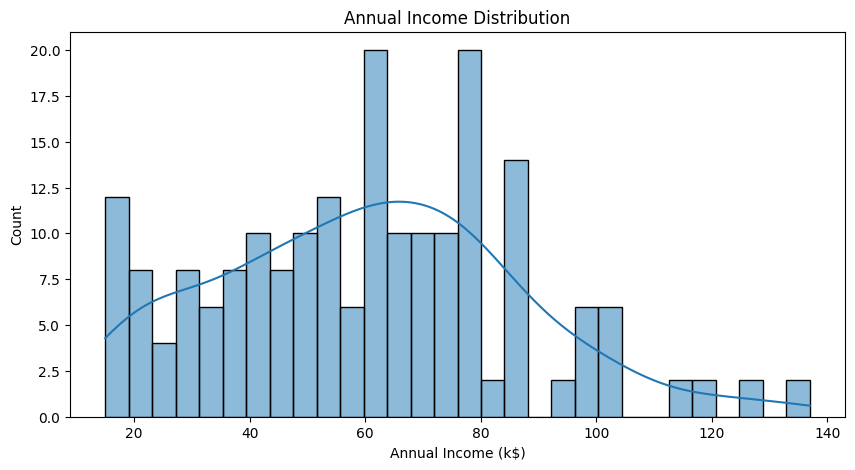

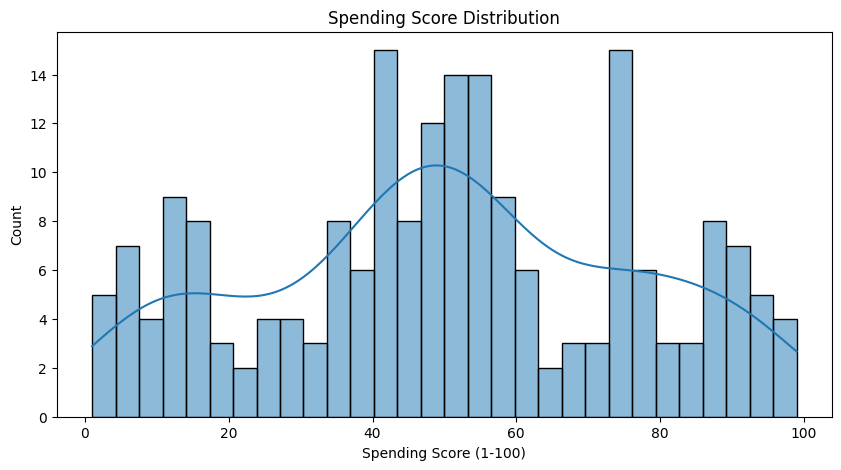

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.histplot(data['Age'], bins=30, kde=True)
plt.title('Age Distribution')

plt.figure(figsize=(10, 5))
sns.histplot(data['Annual Income (k$)'], bins=30, kde=True)
plt.title('Annual Income Distribution')

plt.figure(figsize=(10, 5))
sns.histplot(data['Spending Score (1-100)'], bins=30, kde=True)
plt.title('Spending Score Distribution')
plt.show()

# Data Preprocessing

**Handle Categorical Data**

In [19]:
# Encoding Gender to numerical form
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})

# Drop CustomerID as it’s irrelevant
data = data.drop('CustomerID', axis=1)

# Preview the processed data
print(data.head())

   Gender  Age  Annual Income (k$)  Spending Score (1-100)
0       0   19                  15                      39
1       0   21                  15                      81
2       1   20                  16                       6
3       1   23                  16                      77
4       1   31                  17                      40


#  Feature Scaling

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Define features for clustering
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender']

# Apply Standard Scaler
# Standardization: StandardScaler scales all features to have zero mean and unit variance. This is crucial for K-Means, which is distance-based and sensitive to feature scales.
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[features])

# Check scaled data
print(scaled_data[:5])


[[-1.42456879 -1.73899919 -0.43480148 -1.12815215]
 [-1.28103541 -1.73899919  1.19570407 -1.12815215]
 [-1.3528021  -1.70082976 -1.71591298  0.88640526]
 [-1.13750203 -1.70082976  1.04041783  0.88640526]
 [-0.56336851 -1.66266033 -0.39597992  0.88640526]]


#  PCA for Dimensionality Reduction

Explained Variance Ratio: [0.33690046 0.26230645 0.23260639 0.16818671]


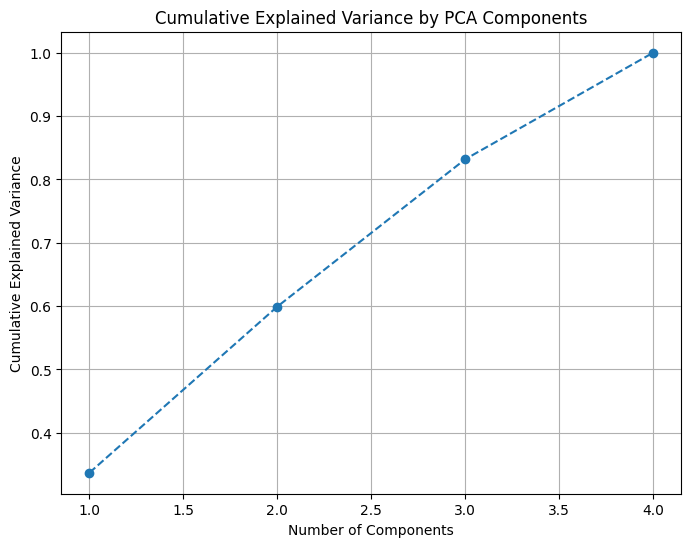

In [21]:
# Apply PCA
pca = PCA()

# Fit and transform the data using PCA
pca_data = pca.fit_transform(scaled_data)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_
print(f"Explained Variance Ratio: {explained_variance}")

# Plot cumulative explained variance to determine number of components
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance.cumsum(), marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

**Select the Number of Components**

In [22]:
# Choose the number of components that explain 95% of the variance
pca = PCA(n_components=3)  # Adjust the number of components based on the cumulative explained variance
pca_data = pca.fit_transform(scaled_data)

print(f'Shape of data after PCA: {pca_data.shape}')

Shape of data after PCA: (200, 3)


# Apply K-Means on PCA-Transformed Data

For K = 2, Silhouette Score = 0.3014857045757265
For K = 3, Silhouette Score = 0.3273623351991666
For K = 4, Silhouette Score = 0.3675602846248438
For K = 5, Silhouette Score = 0.3298193303625333
For K = 6, Silhouette Score = 0.35810950565868493
For K = 7, Silhouette Score = 0.4182251586705845
For K = 8, Silhouette Score = 0.4185608320193546
For K = 9, Silhouette Score = 0.40473669449971444
For K = 10, Silhouette Score = 0.3922508421884803


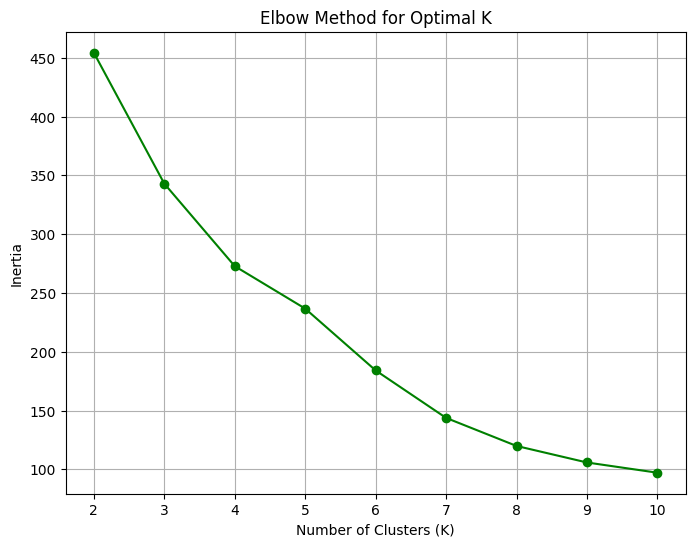

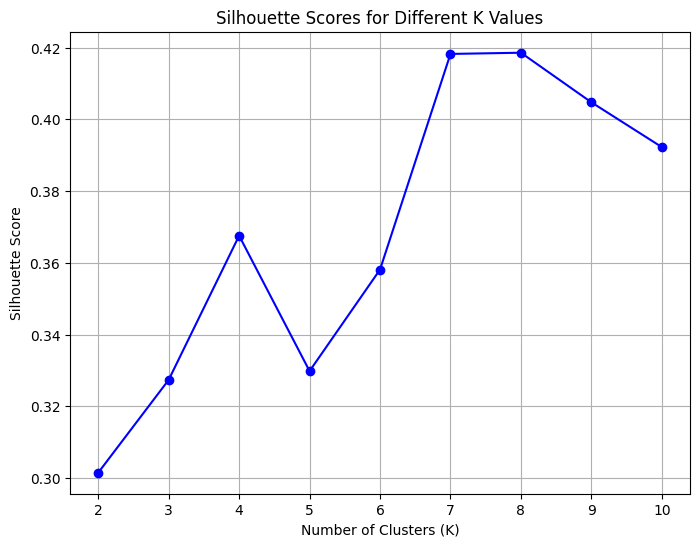

In [23]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Initialize lists to store inertia and silhouette scores
inertia_scores = []
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans_temp = KMeans(n_clusters=k, random_state=42)
    clusters_temp = kmeans_temp.fit_predict(pca_data)

    # Store inertia (Elbow Method)
    inertia_scores.append(kmeans_temp.inertia_)

    # Calculate Silhouette Score
    score = silhouette_score(pca_data, clusters_temp)
    silhouette_scores.append(score)

    print(f"For K = {k}, Silhouette Score = {score}")

# Plot the Elbow Method and Silhouette Scores
plt.figure(figsize=(8, 6))
plt.plot(K_range, inertia_scores, marker='o', linestyle='-', color='g')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(K_range, silhouette_scores, marker='o', linestyle='-', color='b')
plt.title('Silhouette Scores for Different K Values')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

# Fit K-Means

In [24]:
from sklearn.cluster import KMeans

# Fit K-Means on the PCA data with K=7
kmeans_best = KMeans(n_clusters=7, random_state=42)
clusters_best = kmeans_best.fit_predict(pca_data)

# Add the cluster labels to the original data for analysis
data['Cluster'] = clusters_best

# Final K-Means Clustering with Best K

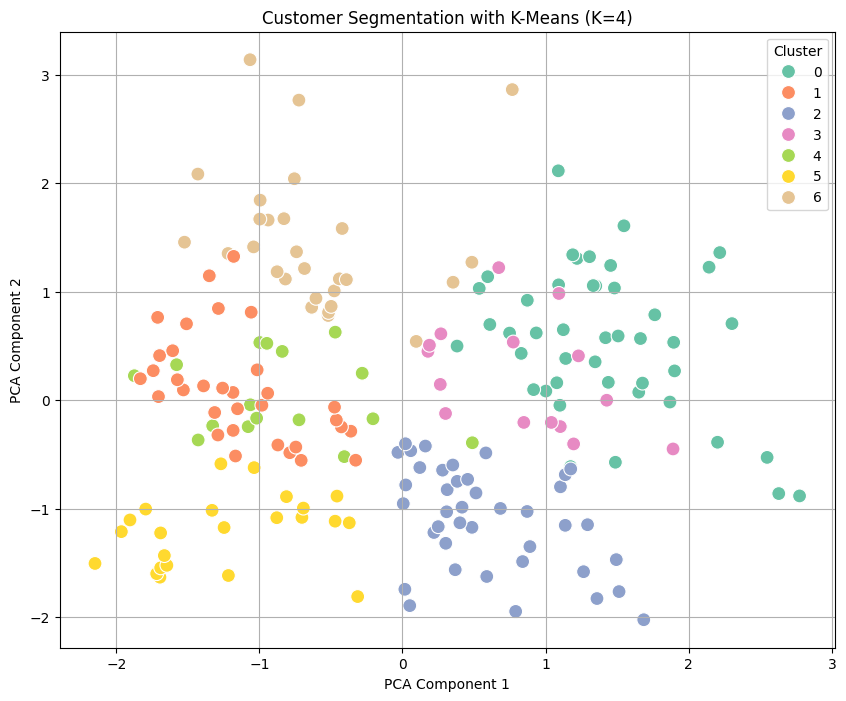

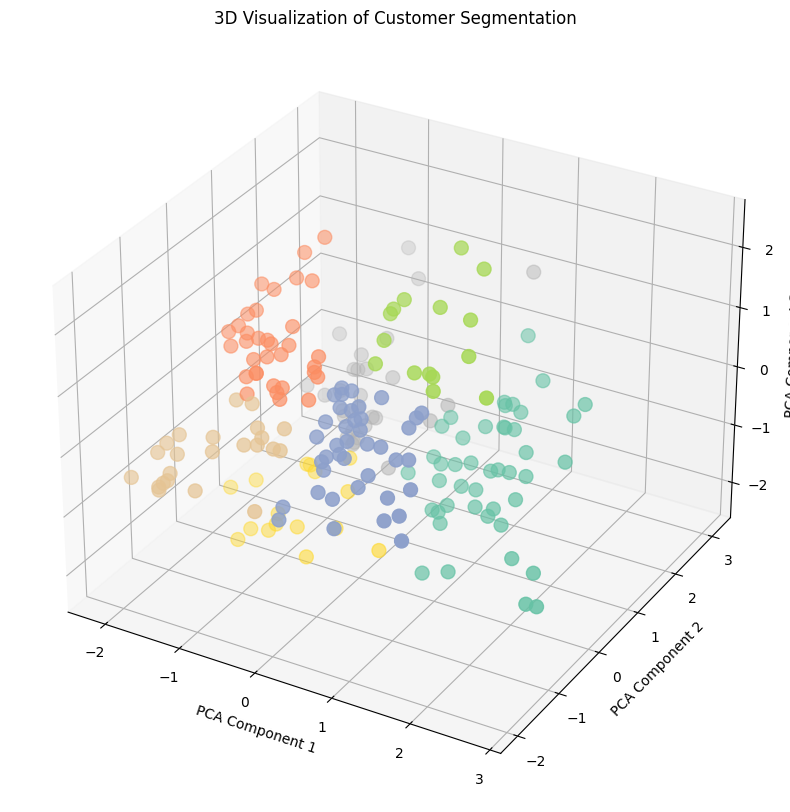

In [25]:
# Scatter plot of clusters based on the first two PCA components
plt.figure(figsize=(10, 8))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=clusters_best, palette='Set2', s=100)
plt.title('Customer Segmentation with K-Means (K=4)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# Optional: 3D plot to visualize all three PCA components
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_data[:, 0], pca_data[:, 1], pca_data[:, 2], c=clusters_best, cmap='Set2', s=100)
ax.set_title('3D Visualization of Customer Segmentation')
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
plt.show()

# Save the Optimized Model

In [26]:
import pickle

# Save the optimized K-Means model
with open('kmeans_pca_model.pkl', 'wb') as model_file:
    pickle.dump(kmeans_best, model_file)

print(f"K-Means model saved as 'kmeans_pca_model.pkl' with K = {kmeans_best.n_clusters}")

K-Means model saved as 'kmeans_pca_model.pkl' with K = 7
